#Lab Assignment 2 - Genetic Algorithm - Robot Resource Optimization

**Prepared by:**

      Md. Miskat Hossain
      2021-2-60-109
      Department of Computer Science & Engineering
      East West University

**Instructor:**

      Dr. Mohammad Rifat Ahmmad Rashid
      Assistant Professor
      Department of Computer Science & Engineering
      East West University



#Task 01: Data Preparation: Generate mock data for tasks (including durations and priorities) and robots (including efficiency factors).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)
    task_priorities = np.random.randint(1, 6, size=num_tasks)
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)
    return task_durations, task_priorities, robot_efficiencies

#Task 02: Implement a Genetic Algorithm to optimize task assignments considering task duration, robot efficiency, and task priority.

In [18]:
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50
    n_generations = 100
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]

    for generation in range(n_generations):
        fitnesses = [fitness_function(individual, task_durations, task_priorities, robot_efficiencies) for individual in population]
        selected = tournament_selection(population, fitnesses)
        offspring_crossover = crossover(selected, len(task_durations), population_size - len(selected))
        offspring_mutation = mutate(offspring_crossover, len(task_durations))
        population = selected + offspring_mutation

    fitnesses = [fitness_function(individual, task_durations, task_priorities, robot_efficiencies) for individual in population]
    best_index = np.argmax(fitnesses)
    best_solution = population[best_index]

    return best_solution

#Task 03: Apply Genetic Algorithm Components (Fitness Function, Selection, Crossover, and Mutation)

In [19]:
def fitness_function(solution, task_durations, task_priorities, robot_efficiencies):
    total_times = np.zeros(len(robot_efficiencies))
    for i, robot_index in enumerate(solution):
        total_times[robot_index] += (task_durations[i] * task_priorities[i]) / robot_efficiencies[robot_index]
    total_time = max(total_times)
    workload_balance = np.std(total_times)
    f = 1 / (total_time + workload_balance)
    return f

def tournament_selection(population, fitnesses, tournament_size=3):
    selected_parents = []
    for _ in range(len(population)):
        tournament = np.random.choice(len(population), tournament_size, replace=False)
        winner_index = tournament[np.argmax([fitnesses[i] for i in tournament])]
        selected_parents.append(population[winner_index])
    return selected_parents


def crossover(parents, num_tasks, offspring_size):
    offspring = []
    while len(offspring) < offspring_size:
        parent1, parent2 = np.random.choice(len(parents), 2, replace=False)
        crossover_point = np.random.randint(1, num_tasks - 1)
        child1 = np.concatenate([parents[parent1][:crossover_point], parents[parent2][crossover_point:]])
        child2 = np.concatenate([parents[parent2][:crossover_point], parents[parent1][crossover_point:]])
        offspring.extend([child1, child2])
    return offspring[:offspring_size]


def mutate(offspring, num_tasks, mutation_rate=0.1):
    for child in offspring:
        if np.random.rand() < mutation_rate:
            swap_points = np.random.choice(num_tasks, 2, replace=False)
            child[swap_points[0]], child[swap_points[1]] = child[swap_points[1]], child[swap_points[0]]
    return offspring





#Task 04: Visualization: Create a grid visualization of the task assignments highlighting key information.

In [28]:
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
  grid = np.zeros((len(robot_efficiencies), len(task_durations)))
  for task_idx, robot_idx in enumerate(solution):
    grid[robot_idx, task_idx] = task_durations[task_idx]

  fig, ax = plt.subplots(figsize=(12, 6))
  cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])

  cax = ax.matshow(grid, cmap=cmap)
  fig.colorbar(cax, label='Task Duration (hours)')


  for i in range(len(robot_efficiencies)):
    for j in range(len(task_durations)):
      priority_str = f"P-{task_priorities[j]}"
      duration_str = f"{task_durations[j]:.1f}h"
      ax.text(j, i, f"{priority_str}\n{duration_str}", ha='center', va='center', fontsize=8)

  ax.set_xticks(np.arange(len(task_durations)))
  ax.set_yticks(np.arange(len(robot_efficiencies)))
  ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
  ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

  plt.xlabel('Tasks')
  plt.ylabel('Robots')
  plt.title('Task Assignments with Task Duration and Priority')

  priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
  plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

  plt.tight_layout()
  plt.show()

#Main Function

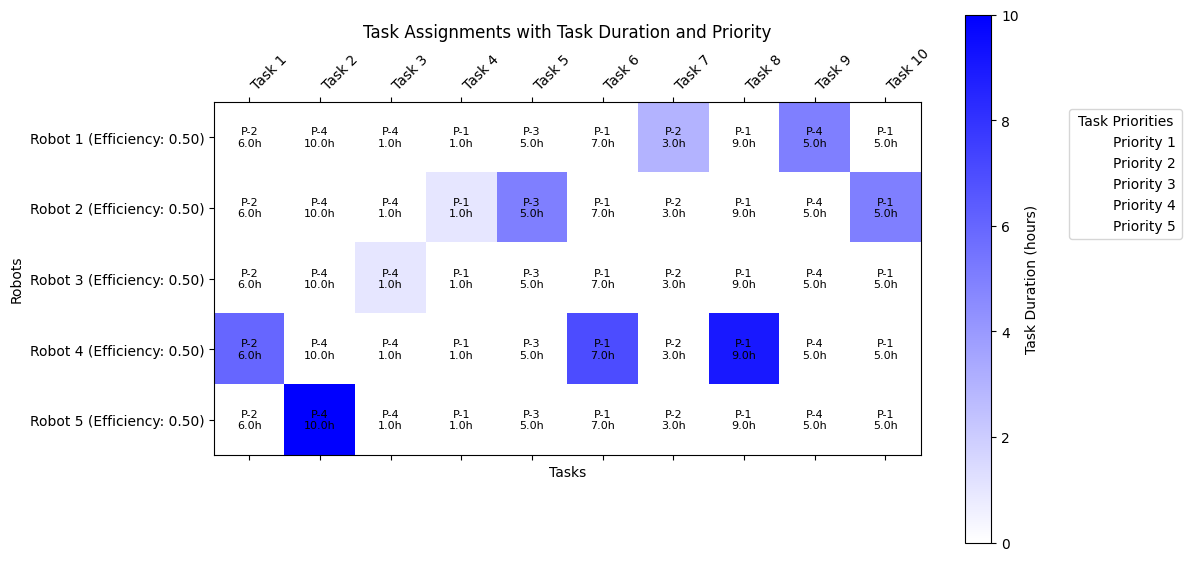

In [34]:
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)
    #task_durations = [x for x in range(11)]# Task durations
    #task_priorities = [x for x in range(11)]   # Task priorities
    robot_efficiencies = [0.5,0.5,0.5,0.5,0.5]
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)